In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import logging
rl = logging.getLogger()
rl.setLevel(logging.INFO)

In [3]:
import sys
sys.path.append("..")

In [4]:
import qnm

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('text', usetex = True)

# Exploring values of inversion error function

In [6]:
qnm.radial.leaver_cf_trunc_inversion(0.4-0.2j, 0., -2, 2, 4.+0.j, 0, 300, 1.+0.j)

(-3.7832264403820357-1.8368923380529323j)

In [7]:
Npts=100
omegar=np.arange(0.2, .5, .3/Npts)
omegai=np.arange(-0.2, -0., .2/Npts)
Or, Oi = np.meshgrid(omegar, omegai)
Os = Or + 1.j*Oi

In [8]:
leav1 = lambda omega: qnm.radial.leaver_cf_trunc_inversion(omega, 0., -2, 2, 4.+0.j, 0, 300, 0.j)
leavf = np.vectorize(leav1)
Leavers = leavf(Os)

In [9]:
def leav1(omega): 
    inv_err, cf_err, its = qnm.radial.leaver_cf_inv_lentz(omega, 0., -2, 2, 4.+0.j, 0)
    # logging.info("Lentz terminated with cf_err={}, its={}".format(cf_err, its))
    return inv_err
leavf = np.vectorize(leav1)
Leavers = leavf(Os)

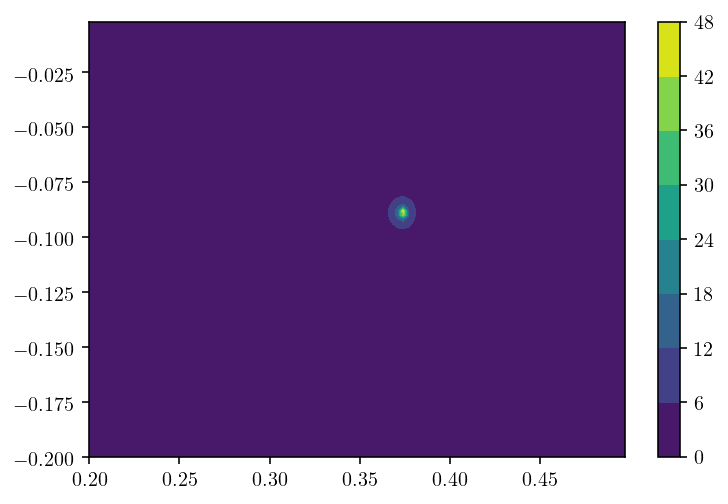

In [10]:
CS = plt.contourf(Or, Oi, 1/np.abs(Leavers))
plt.colorbar(CS)
plt.show()

In [11]:
qnm.angular.sep_const_closest(4., -2, 0.1, 2, 20)

(3.7259203780062347+0j)

In [12]:
Npts=120
orrange=[0., .4]
oirange=[-2.3,-0.75]
omegar=np.arange(orrange[0], orrange[1], (orrange[1]-orrange[0])/Npts)
omegai=np.arange(oirange[0], oirange[1], (oirange[1]-oirange[0])/Npts)
Or, Oi = np.meshgrid(omegar, omegai)
Os = Or + 1.j*Oi

In [13]:
a = 1.e-6
s = -2
m = 2
l = 2

n_inv = 6
Nr = 300
r_N = 0.
l_max = 20

def leav1(omega):
    inv_err, _, _ = qnm.radial.leaver_cf_inv_lentz(omega, a, s, m,
                                               qnm.angular.sep_const_closest(qnm.angular.swsphericalh_A(s,l,m),
                                                                                 s, a*omega, m, l_max),
                                               n_inv, N_max=400)
    return inv_err

leavf = np.vectorize(leav1)
Leavers = leavf(Os)

In [14]:
leav1(-2.j+1.e-30)

(-6.458744650217341e-11-1.8932675117344805e-05j)

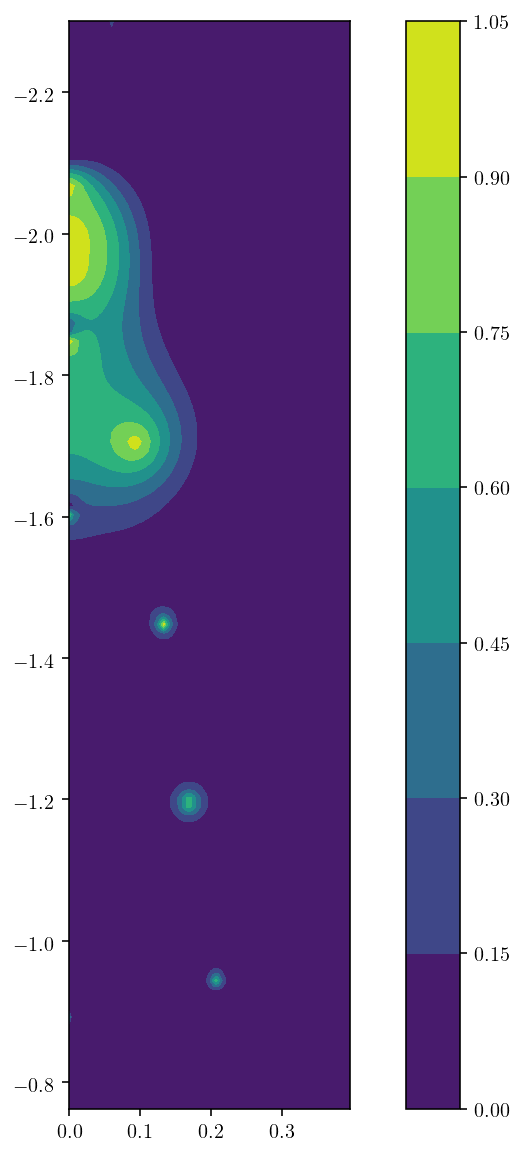

In [15]:
plt.figure(figsize=(10,10))
CS = plt.contourf(Or, Oi, np.exp(-np.abs(Leavers)))
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.colorbar(CS)
plt.savefig("test.png", bbox_inches="tight", dpi=300)
plt.show()

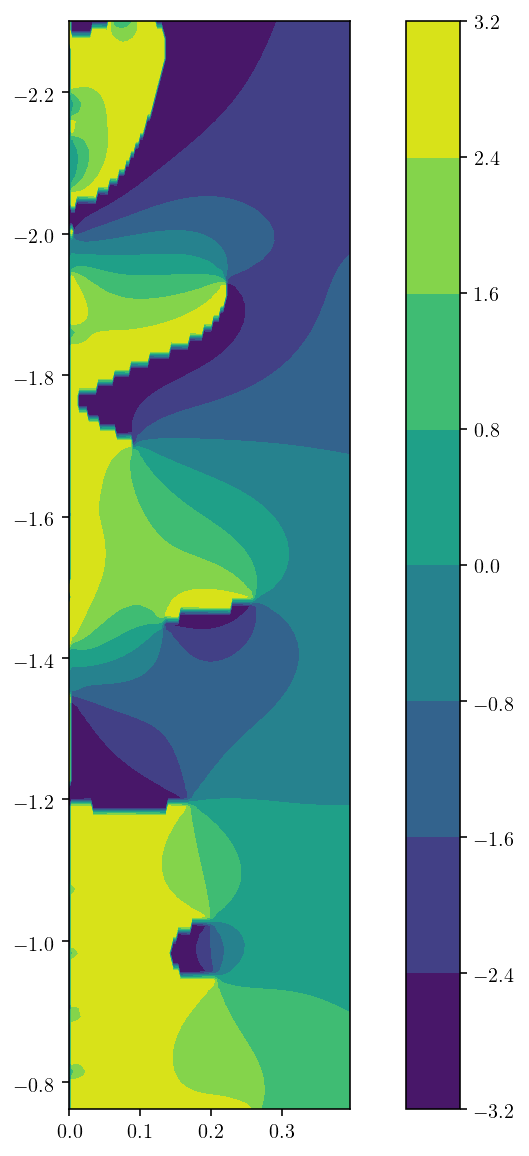

In [16]:
plt.figure(figsize=(10,10))
CS = plt.contourf(Or, Oi, np.angle(Leavers))
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.colorbar(CS)
plt.show()

In [17]:
from scipy import optimize

In [18]:
a = 0.5
s = -2
m = 2

n_inv = 3
Nr = 300
r_N = 0.
l_max = 20

A0 = 4.
omega_guess = 1.-1.j

def leavA(x):
    omega = x[0] + 1.j*x[1]
    A = qnm.angular.sep_const_closest(A0, s, a*omega, m, l_max)
    Leav_err = qnm.radial.leaver_cf_trunc_inversion(omega, a, s, m, A, n_inv, Nr, r_N)
    return [np.real(Leav_err), np.imag(Leav_err)]

sol = optimize.root(leavA, [np.real(omega_guess), np.imag(omega_guess)], tol=1e-10)
print(sol)
omega_sol = sol.x[0] + 1.j*sol.x[1]
print(omega_sol)

    fjac: array([[-0.57359808, -0.81913689],
       [ 0.81913689, -0.57359808]])
     fun: array([-1.33226763e-14, -2.08721929e-14])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-1.81513595e-12, -8.49256196e-13])
       r: array([-37.83289639, -11.46901807,  -6.65014296])
  status: 1
 success: True
       x: array([ 0.34774125, -0.83259476])
(0.3477412539359394-0.8325947550362678j)


In [19]:
qnm.angular.sep_consts(s, a*omega_sol, m, l_max)

array([  3.64660074+1.21471602j,   9.82630392+0.6137243j ,
        17.91099677+0.38582177j,  27.95981518+0.27679539j,
        39.98983299+0.21636142j,  54.00938032+0.17936711j,
        70.0227435 +0.15505889j,  88.0322533 +0.13821883j,
       108.03924895+0.12606481j, 130.04453913+0.11700177j,
       154.04863361+0.11006122j, 180.05186591+0.10462704j,
       208.05446134+0.10029188j, 238.05657636+0.09677759j,
       270.05832233+0.0938889j , 304.05978018+0.09148542j,
       340.06100989+0.08946407j, 418.04949541+0.07276048j,
       378.06205594+0.08780761j])

In [20]:
qnm.angular.sep_consts(s, 0., 2, 20)

array([  4.+0.j,  10.+0.j,  18.+0.j,  28.+0.j,  40.+0.j,  54.+0.j,
        70.+0.j,  88.+0.j, 108.+0.j, 130.+0.j, 154.+0.j, 180.+0.j,
       208.+0.j, 238.+0.j, 270.+0.j, 304.+0.j, 340.+0.j, 378.+0.j,
       418.+0.j])

# Testing the NearbyRootFinder class

In [21]:
from qnm.nearby import NearbyRootFinder

In [22]:
tol = 1e-10
a = 1e-10
s = -2
m = 2

n_inv = 8
Nr = 300
r_N = 0.
l_max = 20

A0 = 4.
omega_guess = 1.e-15-2.j

In [23]:
finder = NearbyRootFinder(a=a, s=s, m=m, A_closest_to=A0,
                            l_max=l_max, omega_guess=omega_guess,
                            tol=tol, n_inv=n_inv, Nr=Nr, r_N=r_N, Nr_max=6000)

In [24]:
finder.do_solve()

(5.449927616463862e-12-1.9999999631213654j)

In [25]:
finder.get_cf_err()

(4.946943578310056e-09, 5999)

In [26]:
finder.set_params(a=0.1)
finder.set_params(Nr=300)
o1 = finder.do_solve()
finder.set_params(Nr=301)
o2 = finder.do_solve()
print(o1)
print(o1-o2)
print(np.abs(o1-o2))

(0.10061986644253162-2.0846631058683593j)
0j
0.0


In [27]:
finder.set_params(a=0.3)
finder.set_params(l_max=20)
o1 = finder.do_solve()
finder.set_params(l_max=21)
o2 = finder.do_solve()
print(o1)
print(o1-o2)
print(np.abs(o1-o2))

(0.004876401732206959-1.9997321614437211j)
(-1.1474473281258835e-11+9.555911617553647e-12j)
1.493248083624485e-11


# Testing the KerrSpinSeq class

In [6]:
import time

In [7]:
from qnm.spinsequence import KerrSpinSeq

In [8]:
start = time.time()

a_max = .998
tol=1e-10

ns=np.arange(0,8)
ns=[7]
s=-2
ls=np.arange(2,5)
ls = [3]
seqs = {}
for l in ls:
    ms=np.arange(-l,l+1)
    for m in ms:
        for n in ns:
            seqs[(l,m,n)] = KerrSpinSeq(n=n, a_max=a_max, delta_a=4e-3, s=s, l=l, m=m)
            seqs[(l,m,n)].do_find_sequence()

end = time.time()

print(end - start)

INFO:root:Loading Schw QNM dict from file /Users/leo/src/spectral_qnms/qnm/schwarzschild/data/Schw_dict.pickle
INFO:root:l=3, m=-3, n=7 starting
INFO:root:l=3, m=-3, n=7 completed with 251 points
INFO:root:l=3, m=-2, n=7 starting
INFO:root:l=3, m=-2, n=7 completed with 251 points
INFO:root:l=3, m=-1, n=7 starting
INFO:root:l=3, m=-1, n=7 completed with 251 points
INFO:root:l=3, m=0, n=7 starting
INFO:root:l=3, m=0, n=7 completed with 251 points
INFO:root:l=3, m=1, n=7 starting
INFO:root:l=3, m=1, n=7 completed with 264 points
INFO:root:l=3, m=2, n=7 starting
INFO:root:l=3, m=2, n=7 completed with 270 points
INFO:root:l=3, m=3, n=7 starting
INFO:root:l=3, m=3, n=7 completed with 284 points


53.9460091591


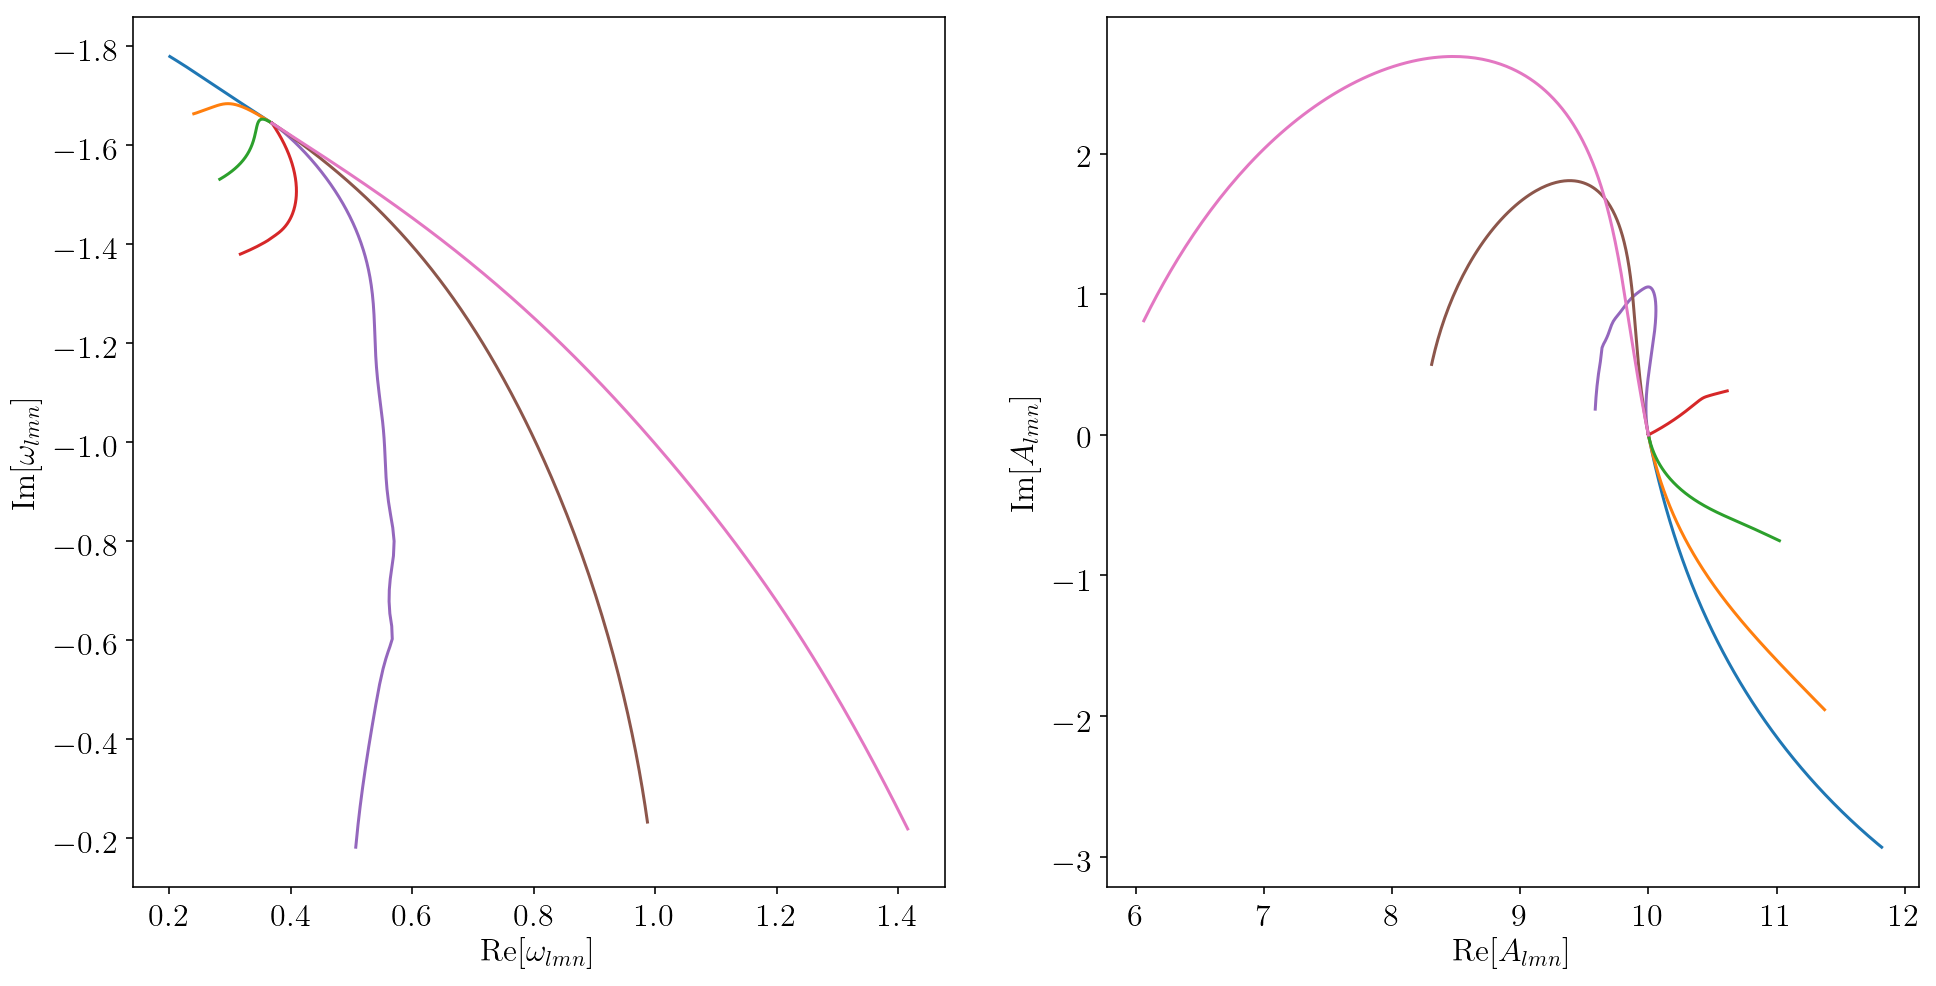

In [32]:
ns=np.arange(0,8)
ns=[7]
s=-2
ls=np.arange(2,5)
ls = [3]

plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)

for l in ls:
    ms = np.arange(-l, l+1)
    for m in ms:
        for n in ns:
            plt.plot(np.real(seqs[(l,m,n)].omega), np.imag(seqs[(l,m,n)].omega))

#plt.xlim(.07,.13)
#plt.ylim(-1.48,-1.455)

plt.gca().invert_yaxis()
plt.gca().tick_params(labelsize=16)
plt.xlabel(r'$\textrm{Re}[\omega_{lmn}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[\omega_{lmn}]$', fontsize=16)

plt.subplot(1, 2, 2)

for l in ls:
    ms = np.arange(-l, l+1)
    for m in ms:
        for n in ns:
            plt.plot(np.real(seqs[(l,m,n)].A), np.imag(seqs[(l,m,n)].A))

plt.gca().tick_params(labelsize=16)
plt.xlabel(r'$\textrm{Re}[A_{lmn}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[A_{lmn}]$', fontsize=16)

plt.savefig("test.png", bbox_inches="tight", dpi=300)

plt.show()

In [ ]:
start = time.time()

a_max = .998
tol=1e-10

ns=np.arange(0,8)
s=-2
l=2
ms=np.arange(-l,l+1)
seqs = {}
for m in ms:
    for n in ns:
        seqs[(l,m,n)] = KerrSpinSeq(n=n, a_max=a_max, delta_a=2.5e-3, s=s, l=l, m=m)
        seqs[(l,m,n)].do_find_sequence()
        
end = time.time()

print(end - start)

In [141]:
import pickle

with open('test.pickle', 'wb') as handle:
    pickle.dump(seqs, handle, protocol=pickle.HIGHEST_PROTOCOL)

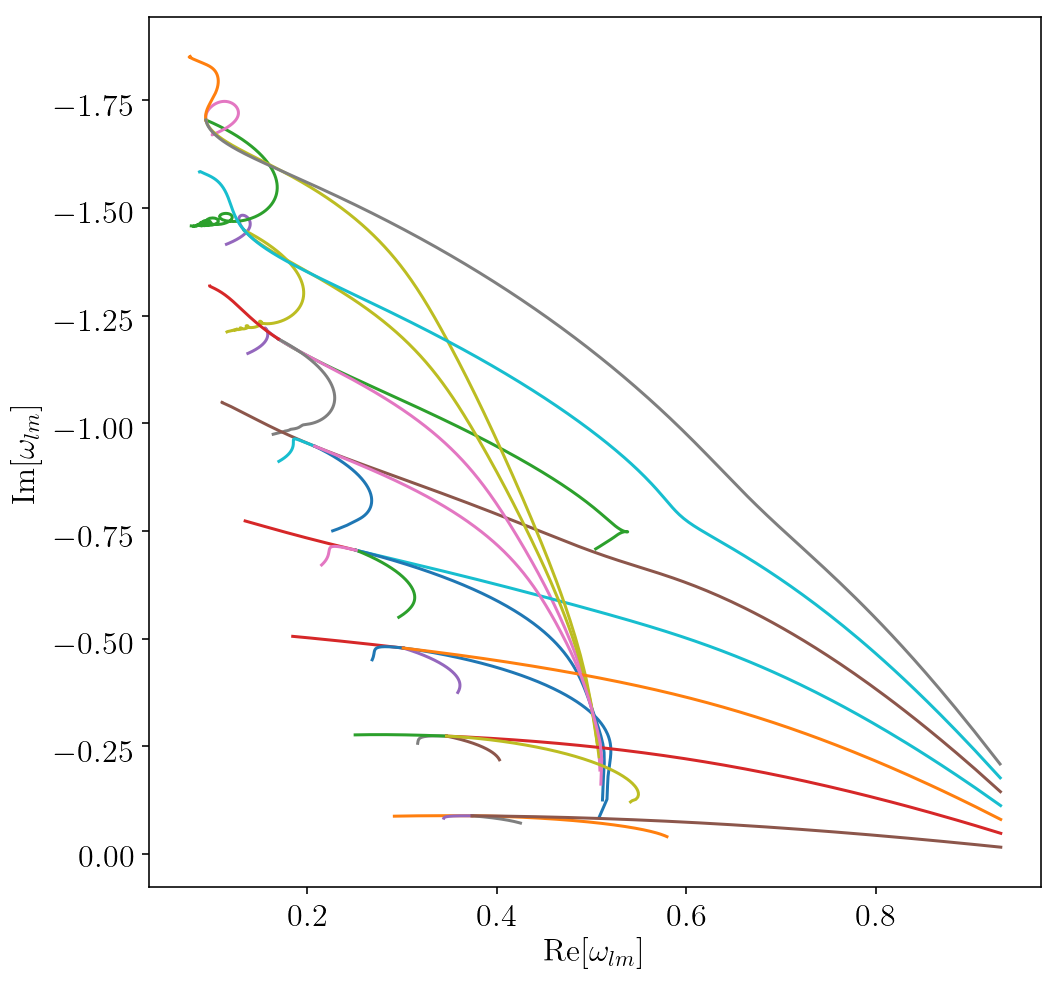

In [147]:
plt.figure(figsize=(8,8))

for (l,m,n), seq in seqs.iteritems():
    plt.plot(np.real(seq.omega), np.imag(seq.omega))
#plt.xlim(-1.5, 1.5)
#plt.ylim(-1.7,0.)

plt.gca().invert_yaxis()
plt.gca().tick_params(labelsize=16)
plt.xlabel(r'$\textrm{Re}[\omega_{lm}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[\omega_{lm}]$', fontsize=16)
plt.savefig("test.png", bbox_inches="tight", dpi=300)
plt.show()

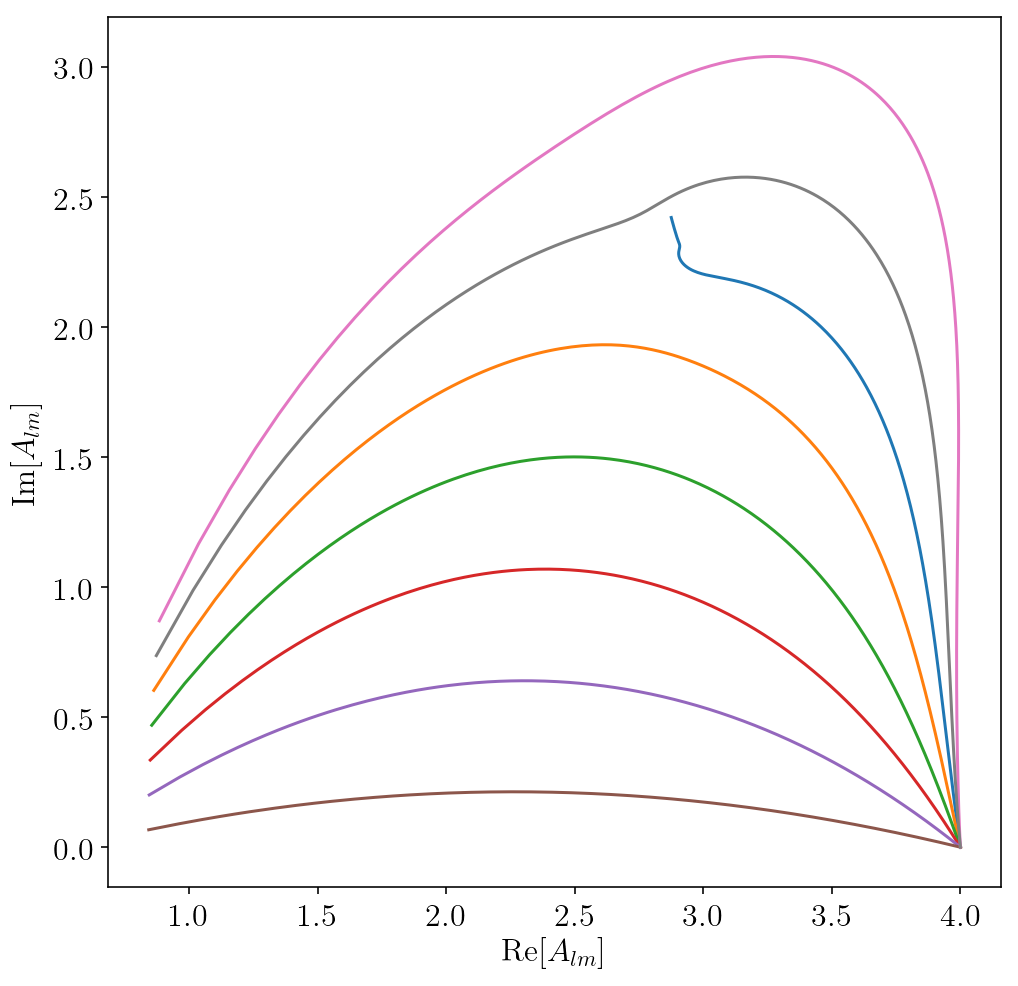

In [148]:
plt.figure(figsize=(8,8))

for (l,m,n), seq in seqs.iteritems():
    if (m==2):
        plt.plot(np.real(seq.A), np.imag(seq.A))

plt.gca().tick_params(labelsize=16)
plt.xlabel(r'$\textrm{Re}[A_{lm}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[A_{lm}]$', fontsize=16)
# plt.savefig("test.png", bbox_inches="tight", dpi=300)

plt.show()

# Testing the build_Schw_dict function and auto-generating dict in module

In [6]:
from qnm.schwarzschild.tabulated import build_Schw_dict

Note to self. Need to actually use N_max. Inspect what's going on with the # iters below to come up with reasonable values for N_max. Get those iters by modifying build_Schw_dict. Actually change the value of Nr_max in NearbyRootFinder instead of using np.Inf

In [10]:
n_max = 20
l_max = 20
s_arr = [-2, -1, 0]

tol = 1e-10

Schw_dict = build_Schw_dict(s_arr=s_arr, n_max=n_max, l_max=l_max, tol=tol)


INFO:root:s=-2, l=2, found what I think is n=0, omega=(0.373671684418-0.0889623156889j)
INFO:root:s=-2, l=2, found what I think is n=1, omega=(0.346710996879-0.273914875291j)
INFO:root:s=-2, l=2, found what I think is n=2, omega=(0.301053454613-0.478276983221j)
INFO:root:s=-2, l=2, found what I think is n=3, omega=(0.251504962226-0.705148202442j)
INFO:root:s=-2, l=2, found what I think is n=4, omega=(0.20751457983-0.946844890905j)
INFO:root:s=-2, l=2, found what I think is n=5, omega=(0.16929940307-1.19560805409j)
INFO:root:s=-2, l=2, found what I think is n=6, omega=(0.133252340199-1.44791062621j)
INFO:root:s=-2, l=2, found what I think is n=7, omega=(0.0928223337522-1.70384117213j)
INFO:root:s=-2, l=2, found what I think is n=8, omega=(1.96919092685e-11-2.01352055824j)
INFO:root:s=-2, l=2, found what I think is n=9, omega=(0.0632633575949-2.30264463398j)
INFO:root:s=-2, l=2, found what I think is n=10, omega=(0.0825981429263-2.81544234716j)
INFO:root:Potentially skipped an overtone i

INFO:root:s=-2, l=6, found what I think is n=10, omega=(0.91318560041-2.23969771966j)
INFO:root:s=-2, l=6, found what I think is n=11, omega=(0.881159139781-2.48352467735j)
INFO:root:s=-2, l=6, found what I think is n=12, omega=(0.851718651734-2.72998986128j)
INFO:root:s=-2, l=6, found what I think is n=13, omega=(0.824767757024-2.97840658617j)
INFO:root:s=-2, l=6, found what I think is n=14, omega=(0.800125127458-3.22824388626j)
INFO:root:s=-2, l=6, found what I think is n=15, omega=(0.777575567798-3.47910212568j)
INFO:root:s=-2, l=6, found what I think is n=16, omega=(0.756900000575-3.73068525606j)
INFO:root:s=-2, l=6, found what I think is n=17, omega=(0.737891185462-3.98277586325j)
INFO:root:s=-2, l=6, found what I think is n=18, omega=(0.720360733649-4.23521495274j)
INFO:root:s=-2, l=6, found what I think is n=19, omega=(0.704141213978-4.48788644527j)
INFO:root:s=-2, l=6, found what I think is n=20, omega=(0.689085700755-4.74070563405j)
INFO:root:s=-2, l=7, found what I think is n

INFO:root:s=-2, l=11, found what I think is n=1, omega=(2.1866479578-0.28804003785j)
INFO:root:s=-2, l=11, found what I think is n=2, omega=(2.17734151129-0.480952475007j)
INFO:root:s=-2, l=11, found what I think is n=3, omega=(2.16354607284-0.675183841924j)
INFO:root:s=-2, l=11, found what I think is n=4, omega=(2.145461695-0.871240464688j)
INFO:root:s=-2, l=11, found what I think is n=5, omega=(2.1233586485-1.0696033551j)
INFO:root:s=-2, l=11, found what I think is n=6, omega=(2.09757769399-1.27071596228j)
INFO:root:s=-2, l=11, found what I think is n=7, omega=(2.06852726891-1.47496962584j)
INFO:root:s=-2, l=11, found what I think is n=8, omega=(2.03667611646-1.68268786946j)
INFO:root:s=-2, l=11, found what I think is n=9, omega=(2.00254040561-1.89411147892j)
INFO:root:s=-2, l=11, found what I think is n=10, omega=(1.96666537277-2.10938683988j)
INFO:root:s=-2, l=11, found what I think is n=11, omega=(1.92960278572-2.32855997902j)
INFO:root:s=-2, l=11, found what I think is n=12, omeg

INFO:root:s=-2, l=15, found what I think is n=12, omega=(2.723799387-2.49116397021j)
INFO:root:s=-2, l=15, found what I think is n=13, omega=(2.68863659403-2.70521694414j)
INFO:root:s=-2, l=15, found what I think is n=14, omega=(2.65239738402-2.92214065941j)
INFO:root:s=-2, l=15, found what I think is n=15, omega=(2.61538180844-3.14193928103j)
INFO:root:s=-2, l=15, found what I think is n=16, omega=(2.57788025212-3.3645774037j)
INFO:root:s=-2, l=15, found what I think is n=17, omega=(2.54016666574-3.58998310621j)
INFO:root:s=-2, l=15, found what I think is n=18, omega=(2.5024927983-3.8180524802j)
INFO:root:s=-2, l=15, found what I think is n=19, omega=(2.4650838067-4.04865524456j)
INFO:root:s=-2, l=15, found what I think is n=20, omega=(2.42813542686-4.28164096698j)
INFO:root:s=-2, l=16, found what I think is n=0, omega=(3.16022876243-0.0960797526128j)
INFO:root:s=-2, l=16, found what I think is n=1, omega=(3.15697631234-0.288368055603j)
INFO:root:s=-2, l=16, found what I think is n=2,

INFO:root:s=-2, l=20, found what I think is n=2, omega=(3.9251700272-0.481071584312j)
INFO:root:s=-2, l=20, found what I think is n=3, omega=(3.91737295622-0.674081849711j)
INFO:root:s=-2, l=20, found what I think is n=4, omega=(3.90703041942-0.867671500719j)
INFO:root:s=-2, l=20, found what I think is n=5, omega=(3.89418870981-1.06200271348j)
INFO:root:s=-2, l=20, found what I think is n=6, omega=(3.87890611813-1.25723488033j)
INFO:root:s=-2, l=20, found what I think is n=7, omega=(3.86125312578-1.45352371565j)
INFO:root:s=-2, l=20, found what I think is n=8, omega=(3.84131254816-1.65102021915j)
INFO:root:s=-2, l=20, found what I think is n=9, omega=(3.81917958319-1.84986949224j)
INFO:root:s=-2, l=20, found what I think is n=10, omega=(3.79496171661-2.05020941539j)
INFO:root:s=-2, l=20, found what I think is n=11, omega=(3.76877843439-2.25216920757j)
INFO:root:s=-2, l=20, found what I think is n=12, omega=(3.74076069581-2.45586790404j)
INFO:root:s=-2, l=20, found what I think is n=13,

INFO:root:s=-1, l=4, found what I think is n=13, omega=(0.507300479688-3.11226128394j)
INFO:root:s=-1, l=4, found what I think is n=14, omega=(0.492651058169-3.36526100751j)
INFO:root:s=-1, l=4, found what I think is n=15, omega=(0.479423471811-3.61835789143j)
INFO:root:s=-1, l=4, found what I think is n=16, omega=(0.467406763433-3.87147293591j)
INFO:root:s=-1, l=4, found what I think is n=17, omega=(0.4564282527-4.12455641183j)
INFO:root:s=-1, l=4, found what I think is n=18, omega=(0.446346087629-4.37757754745j)
INFO:root:s=-1, l=4, found what I think is n=19, omega=(0.437043102958-4.63051792453j)
INFO:root:s=-1, l=4, found what I think is n=20, omega=(0.428421902834-4.8833672109j)
INFO:root:s=-1, l=5, found what I think is n=0, omega=(1.04791278193-0.0959816720295j)
INFO:root:s=-1, l=5, found what I think is n=1, omega=(1.03822088787-0.289103859673j)
INFO:root:s=-1, l=5, found what I think is n=2, omega=(1.01944230406-0.485645532504j)
INFO:root:s=-1, l=5, found what I think is n=3, 

INFO:root:s=-1, l=9, found what I think is n=4, omega=(1.76770230057-0.876741944439j)
INFO:root:s=-1, l=9, found what I think is n=5, omega=(1.74194453568-1.07836762972j)
INFO:root:s=-1, l=9, found what I think is n=6, omega=(1.71234524705-1.28382533673j)
INFO:root:s=-1, l=9, found what I think is n=7, omega=(1.67960306332-1.49355332276j)
INFO:root:s=-1, l=9, found what I think is n=8, omega=(1.64448774617-1.70783718117j)
INFO:root:s=-1, l=9, found what I think is n=9, omega=(1.60779720852-1.92679102189j)
INFO:root:s=-1, l=9, found what I think is n=10, omega=(1.57030763655-2.15035558461j)
INFO:root:s=-1, l=9, found what I think is n=11, omega=(1.53272559009-2.37831559267j)
INFO:root:s=-1, l=9, found what I think is n=12, omega=(1.49565099728-2.61033328206j)
INFO:root:s=-1, l=9, found what I think is n=13, omega=(1.45955667779-2.84599080716j)
INFO:root:s=-1, l=9, found what I think is n=14, omega=(1.42478512903-3.08483297537j)
INFO:root:s=-1, l=9, found what I think is n=15, omega=(1.3

INFO:root:s=-1, l=13, found what I think is n=15, omega=(2.21418900896-3.18814962449j)
INFO:root:s=-1, l=13, found what I think is n=16, omega=(2.17672776627-3.41723506139j)
INFO:root:s=-1, l=13, found what I think is n=17, omega=(2.13966633321-3.64914341946j)
INFO:root:s=-1, l=13, found what I think is n=18, omega=(2.10324105505-3.8836682192j)
INFO:root:s=-1, l=13, found what I think is n=19, omega=(2.0676423792-4.12058747842j)
INFO:root:s=-1, l=13, found what I think is n=20, omega=(2.03301657956-4.35967335841j)
INFO:root:s=-1, l=14, found what I think is n=0, omega=(2.78653049835-0.0961902787368j)
INFO:root:s=-1, l=14, found what I think is n=1, omega=(2.78284519525-0.288736922366j)
INFO:root:s=-1, l=14, found what I think is n=2, omega=(2.7755068382-0.481780785377j)
INFO:root:s=-1, l=14, found what I think is n=3, omega=(2.76458030581-0.675649752277j)
INFO:root:s=-1, l=14, found what I think is n=4, omega=(2.75016377401-0.870665866338j)
INFO:root:s=-1, l=14, found what I think is n

INFO:root:s=-1, l=18, found what I think is n=5, omega=(3.51440703762-1.06381960511j)
INFO:root:s=-1, l=18, found what I think is n=6, omega=(3.49762187839-1.2598549728j)
INFO:root:s=-1, l=18, found what I think is n=7, omega=(3.47828001671-1.45717569554j)
INFO:root:s=-1, l=18, found what I think is n=8, omega=(3.45649435404-1.65596121964j)
INFO:root:s=-1, l=18, found what I think is n=9, omega=(3.43239447205-1.85638152221j)
INFO:root:s=-1, l=18, found what I think is n=10, omega=(3.40612623313-2.05859497571j)
INFO:root:s=-1, l=18, found what I think is n=11, omega=(3.37785099052-2.26274607431j)
INFO:root:s=-1, l=18, found what I think is n=12, omega=(3.34774433673-2.46896311488j)
INFO:root:s=-1, l=18, found what I think is n=13, omega=(3.31599434394-2.67735595214j)
INFO:root:s=-1, l=18, found what I think is n=14, omega=(3.28279928537-2.88801396731j)
INFO:root:s=-1, l=18, found what I think is n=15, omega=(3.24836487028-3.10100439768j)
INFO:root:s=-1, l=18, found what I think is n=16,

INFO:root:s=0, l=1, found what I think is n=16, omega=(0.120471827707-4.0676060977j)
INFO:root:s=0, l=1, found what I think is n=17, omega=(0.11841622851-4.31881030613j)
INFO:root:s=0, l=1, found what I think is n=18, omega=(0.116525349038-4.56993300859j)
INFO:root:s=0, l=1, found what I think is n=19, omega=(0.114777832162-4.82098319375j)
INFO:root:s=0, l=1, found what I think is n=20, omega=(0.113156073649-5.07196850333j)
INFO:root:s=0, l=2, found what I think is n=0, omega=(0.483643872211-0.0967587759782j)
INFO:root:s=0, l=2, found what I think is n=1, omega=(0.46385057902-0.295603936988j)
INFO:root:s=0, l=2, found what I think is n=2, omega=(0.430544054377-0.508558402155j)
INFO:root:s=0, l=2, found what I think is n=3, omega=(0.393863062889-0.738096584781j)
INFO:root:s=0, l=2, found what I think is n=4, omega=(0.361299191883-0.97992151949j)
INFO:root:s=0, l=2, found what I think is n=5, omega=(0.334899534987-1.22841080385j)
INFO:root:s=0, l=2, found what I think is n=6, omega=(0.31

INFO:root:s=0, l=6, found what I think is n=7, omega=(1.06913492965-1.54445920574j)
INFO:root:s=0, l=6, found what I think is n=8, omega=(1.03202645541-1.77531005265j)
INFO:root:s=0, l=6, found what I think is n=9, omega=(0.996264836831-2.01150358507j)
INFO:root:s=0, l=6, found what I think is n=10, omega=(0.962543603335-2.25208255903j)
INFO:root:s=0, l=6, found what I think is n=11, omega=(0.931209846105-2.49611345363j)
INFO:root:s=0, l=6, found what I think is n=12, omega=(0.902355446537-2.74277772654j)
INFO:root:s=0, l=6, found what I think is n=13, omega=(0.875909948281-2.99140559813j)
INFO:root:s=0, l=6, found what I think is n=14, omega=(0.851714112439-3.24147304102j)
INFO:root:s=0, l=6, found what I think is n=15, omega=(0.829569918943-3.49258152286j)
INFO:root:s=0, l=6, found what I think is n=16, omega=(0.809270923818-3.74443313036j)
INFO:root:s=0, l=6, found what I think is n=17, omega=(0.790618856099-3.99680735926j)
INFO:root:s=0, l=6, found what I think is n=18, omega=(0.77

INFO:root:s=0, l=10, found what I think is n=20, omega=(1.44674523957-4.50648193754j)
INFO:root:s=0, l=11, found what I think is n=0, omega=(2.21371862472-0.0962506649876j)
INFO:root:s=0, l=11, found what I think is n=1, omega=(2.20908631741-0.289015359336j)
INFO:root:s=0, l=11, found what I think is n=2, omega=(2.19988638598-0.482567468727j)
INFO:root:s=0, l=11, found what I think is n=3, omega=(2.18624932498-0.677422493594j)
INFO:root:s=0, l=11, found what I think is n=4, omega=(2.16837323173-0.874080039299j)
INFO:root:s=0, l=11, found what I think is n=5, omega=(2.14652535275-1.07301428056j)
INFO:root:s=0, l=11, found what I think is n=6, omega=(2.12104210538-1.27466194527j)
INFO:root:s=0, l=11, found what I think is n=7, omega=(2.09232609084-1.4794081544j)
INFO:root:s=0, l=11, found what I think is n=8, omega=(2.0608387088-1.68757122487j)
INFO:root:s=0, l=11, found what I think is n=9, omega=(2.02708749096-1.89938830024j)
INFO:root:s=0, l=11, found what I think is n=10, omega=(1.99

INFO:root:s=0, l=15, found what I think is n=11, omega=(2.77549154731-2.28355529133j)
INFO:root:s=0, l=15, found what I think is n=12, omega=(2.74191746761-2.49500120262j)
INFO:root:s=0, l=15, found what I think is n=13, omega=(2.70696999891-2.70925129246j)
INFO:root:s=0, l=15, found what I think is n=14, omega=(2.67094866106-2.92635060367j)
INFO:root:s=0, l=15, found what I think is n=15, omega=(2.63415063934-3.14630379342j)
INFO:root:s=0, l=15, found what I think is n=16, omega=(2.59686363312-3.36907645391j)
INFO:root:s=0, l=15, found what I think is n=17, omega=(2.55935920418-3.59459810448j)
INFO:root:s=0, l=15, found what I think is n=18, omega=(2.52188709742-3.82276662684j)
INFO:root:s=0, l=15, found what I think is n=19, omega=(2.48467090973-4.05345376725j)
INFO:root:s=0, l=15, found what I think is n=20, omega=(2.44790527671-4.28651123922j)
INFO:root:s=0, l=16, found what I think is n=0, omega=(3.1758045577-0.096237494786j)
INFO:root:s=0, l=16, found what I think is n=1, omega=(

INFO:root:s=0, l=20, found what I think is n=2, omega=(3.93772792477-0.481580237645j)
INFO:root:s=0, l=20, found what I think is n=3, omega=(3.92995893689-0.674791788466j)
INFO:root:s=0, l=20, found what I think is n=4, omega=(3.91965370664-0.868580533123j)
INFO:root:s=0, l=20, found what I think is n=5, omega=(3.90685839813-1.06310800113j)
INFO:root:s=0, l=20, found what I think is n=6, omega=(3.89163112797-1.25853292674j)
INFO:root:s=0, l=20, found what I think is n=7, omega=(3.8740421505-1.45501035656j)
INFO:root:s=0, l=20, found what I think is n=8, omega=(3.85417399291-1.65269061689j)
INFO:root:s=0, l=20, found what I think is n=9, omega=(3.83212149582-1.85171813693j)
INFO:root:s=0, l=20, found what I think is n=10, omega=(3.80799171131-2.05223013566j)
INFO:root:s=0, l=20, found what I think is n=11, omega=(3.78190360996-2.2543551936j)
INFO:root:s=0, l=20, found what I think is n=12, omega=(3.75398755102-2.45821174516j)
INFO:root:s=0, l=20, found what I think is n=13, omega=(3.724

In [7]:
from qnm.schwarzschild.tabulated import QNMDict

In [8]:
# my_dict = Schw_dict

In [9]:
my_dict = QNMDict().load_dict()

INFO:root:Could not load Schw QNM dict from file /Users/leo/src/spectral_qnms/qnm/schwarzschild/data/Schw_dict.pickle, computing
INFO:root:s=-2, l=2, found what I think is n=0, omega=(0.373671684418-0.0889623156889j)
INFO:root:s=-2, l=2, found what I think is n=1, omega=(0.346710996879-0.273914875291j)
INFO:root:s=-2, l=2, found what I think is n=2, omega=(0.301053454613-0.478276983221j)
INFO:root:s=-2, l=2, found what I think is n=3, omega=(0.251504962226-0.705148202442j)
INFO:root:s=-2, l=2, found what I think is n=4, omega=(0.20751457983-0.946844890905j)
INFO:root:s=-2, l=2, found what I think is n=5, omega=(0.16929940307-1.19560805409j)
INFO:root:s=-2, l=2, found what I think is n=6, omega=(0.133252340199-1.44791062621j)
INFO:root:s=-2, l=2, found what I think is n=7, omega=(0.0928223337522-1.70384117213j)
INFO:root:s=-2, l=2, found what I think is n=8, omega=(1.96919092685e-11-2.01352055824j)
INFO:root:s=-2, l=2, found what I think is n=9, omega=(0.0632633575949-2.30264463398j)
IN

INFO:root:s=-2, l=6, found what I think is n=9, omega=(0.947731914727-1.99935920543j)
INFO:root:s=-2, l=6, found what I think is n=10, omega=(0.91318560041-2.23969771966j)
INFO:root:s=-2, l=6, found what I think is n=11, omega=(0.881159139781-2.48352467735j)
INFO:root:s=-2, l=6, found what I think is n=12, omega=(0.851718651734-2.72998986128j)
INFO:root:s=-2, l=6, found what I think is n=13, omega=(0.824767757024-2.97840658617j)
INFO:root:s=-2, l=6, found what I think is n=14, omega=(0.800125127458-3.22824388626j)
INFO:root:s=-2, l=6, found what I think is n=15, omega=(0.777575567798-3.47910212568j)
INFO:root:s=-2, l=6, found what I think is n=16, omega=(0.756900000575-3.73068525606j)
INFO:root:s=-2, l=6, found what I think is n=17, omega=(0.737891185462-3.98277586325j)
INFO:root:s=-2, l=6, found what I think is n=18, omega=(0.720360733649-4.23521495274j)
INFO:root:s=-2, l=6, found what I think is n=19, omega=(0.704141213978-4.48788644527j)
INFO:root:s=-2, l=6, found what I think is n=

INFO:root:s=-2, l=11, found what I think is n=0, omega=(2.19133378045-0.0959245100641j)
INFO:root:s=-2, l=11, found what I think is n=1, omega=(2.1866479578-0.28804003785j)
INFO:root:s=-2, l=11, found what I think is n=2, omega=(2.17734151129-0.480952475007j)
INFO:root:s=-2, l=11, found what I think is n=3, omega=(2.16354607284-0.675183841924j)
INFO:root:s=-2, l=11, found what I think is n=4, omega=(2.145461695-0.871240464688j)
INFO:root:s=-2, l=11, found what I think is n=5, omega=(2.1233586485-1.0696033551j)
INFO:root:s=-2, l=11, found what I think is n=6, omega=(2.09757769399-1.27071596228j)
INFO:root:s=-2, l=11, found what I think is n=7, omega=(2.06852726891-1.47496962584j)
INFO:root:s=-2, l=11, found what I think is n=8, omega=(2.03667611646-1.68268786946j)
INFO:root:s=-2, l=11, found what I think is n=9, omega=(2.00254040561-1.89411147892j)
INFO:root:s=-2, l=11, found what I think is n=10, omega=(1.96666537277-2.10938683988j)
INFO:root:s=-2, l=11, found what I think is n=11, ome

INFO:root:s=-2, l=15, found what I think is n=11, omega=(2.75758332425-2.27993665783j)
INFO:root:s=-2, l=15, found what I think is n=12, omega=(2.723799387-2.49116397021j)
INFO:root:s=-2, l=15, found what I think is n=13, omega=(2.68863659403-2.70521694414j)
INFO:root:s=-2, l=15, found what I think is n=14, omega=(2.65239738402-2.92214065941j)
INFO:root:s=-2, l=15, found what I think is n=15, omega=(2.61538180844-3.14193928103j)
INFO:root:s=-2, l=15, found what I think is n=16, omega=(2.57788025212-3.3645774037j)
INFO:root:s=-2, l=15, found what I think is n=17, omega=(2.54016666574-3.58998310621j)
INFO:root:s=-2, l=15, found what I think is n=18, omega=(2.5024927983-3.8180524802j)
INFO:root:s=-2, l=15, found what I think is n=19, omega=(2.4650838067-4.04865524456j)
INFO:root:s=-2, l=15, found what I think is n=20, omega=(2.42813542686-4.28164096698j)
INFO:root:s=-2, l=16, found what I think is n=0, omega=(3.16022876243-0.0960797526128j)
INFO:root:s=-2, l=16, found what I think is n=1,

INFO:root:s=-2, l=20, found what I think is n=1, omega=(3.93038713382-0.288476509837j)
INFO:root:s=-2, l=20, found what I think is n=2, omega=(3.9251700272-0.481071584312j)
INFO:root:s=-2, l=20, found what I think is n=3, omega=(3.91737295622-0.674081849711j)
INFO:root:s=-2, l=20, found what I think is n=4, omega=(3.90703041942-0.867671500719j)
INFO:root:s=-2, l=20, found what I think is n=5, omega=(3.89418870981-1.06200271348j)
INFO:root:s=-2, l=20, found what I think is n=6, omega=(3.87890611813-1.25723488033j)
INFO:root:s=-2, l=20, found what I think is n=7, omega=(3.86125312578-1.45352371565j)
INFO:root:s=-2, l=20, found what I think is n=8, omega=(3.84131254816-1.65102021915j)
INFO:root:s=-2, l=20, found what I think is n=9, omega=(3.81917958319-1.84986949224j)
INFO:root:s=-2, l=20, found what I think is n=10, omega=(3.79496171661-2.05020941539j)
INFO:root:s=-2, l=20, found what I think is n=11, omega=(3.76877843439-2.25216920757j)
INFO:root:s=-2, l=20, found what I think is n=12,

INFO:root:s=-1, l=4, found what I think is n=12, omega=(0.52362944166-2.85948321339j)
INFO:root:s=-1, l=4, found what I think is n=13, omega=(0.507300479688-3.11226128394j)
INFO:root:s=-1, l=4, found what I think is n=14, omega=(0.492651058169-3.36526100751j)
INFO:root:s=-1, l=4, found what I think is n=15, omega=(0.479423471811-3.61835789143j)
INFO:root:s=-1, l=4, found what I think is n=16, omega=(0.467406763433-3.87147293591j)
INFO:root:s=-1, l=4, found what I think is n=17, omega=(0.4564282527-4.12455641183j)
INFO:root:s=-1, l=4, found what I think is n=18, omega=(0.446346087629-4.37757754745j)
INFO:root:s=-1, l=4, found what I think is n=19, omega=(0.437043102958-4.63051792453j)
INFO:root:s=-1, l=4, found what I think is n=20, omega=(0.428421902834-4.8833672109j)
INFO:root:s=-1, l=5, found what I think is n=0, omega=(1.04791278193-0.0959816720295j)
INFO:root:s=-1, l=5, found what I think is n=1, omega=(1.03822088787-0.289103859673j)
INFO:root:s=-1, l=5, found what I think is n=2, 

INFO:root:s=-1, l=9, found what I think is n=3, omega=(1.78902144-0.678386800805j)
INFO:root:s=-1, l=9, found what I think is n=4, omega=(1.76770230057-0.876741944439j)
INFO:root:s=-1, l=9, found what I think is n=5, omega=(1.74194453568-1.07836762972j)
INFO:root:s=-1, l=9, found what I think is n=6, omega=(1.71234524705-1.28382533673j)
INFO:root:s=-1, l=9, found what I think is n=7, omega=(1.67960306332-1.49355332276j)
INFO:root:s=-1, l=9, found what I think is n=8, omega=(1.64448774617-1.70783718117j)
INFO:root:s=-1, l=9, found what I think is n=9, omega=(1.60779720852-1.92679102189j)
INFO:root:s=-1, l=9, found what I think is n=10, omega=(1.57030763655-2.15035558461j)
INFO:root:s=-1, l=9, found what I think is n=11, omega=(1.53272559009-2.37831559267j)
INFO:root:s=-1, l=9, found what I think is n=12, omega=(1.49565099728-2.61033328206j)
INFO:root:s=-1, l=9, found what I think is n=13, omega=(1.45955667779-2.84599080716j)
INFO:root:s=-1, l=9, found what I think is n=14, omega=(1.4247

INFO:root:s=-1, l=13, found what I think is n=14, omega=(2.25176867482-2.96206743699j)
INFO:root:s=-1, l=13, found what I think is n=15, omega=(2.21418900896-3.18814962449j)
INFO:root:s=-1, l=13, found what I think is n=16, omega=(2.17672776627-3.41723506139j)
INFO:root:s=-1, l=13, found what I think is n=17, omega=(2.13966633321-3.64914341946j)
INFO:root:s=-1, l=13, found what I think is n=18, omega=(2.10324105505-3.8836682192j)
INFO:root:s=-1, l=13, found what I think is n=19, omega=(2.0676423792-4.12058747842j)
INFO:root:s=-1, l=13, found what I think is n=20, omega=(2.03301657956-4.35967335841j)
INFO:root:s=-1, l=14, found what I think is n=0, omega=(2.78653049835-0.0961902787368j)
INFO:root:s=-1, l=14, found what I think is n=1, omega=(2.78284519525-0.288736922366j)
INFO:root:s=-1, l=14, found what I think is n=2, omega=(2.7755068382-0.481780785377j)
INFO:root:s=-1, l=14, found what I think is n=3, omega=(2.76458030581-0.675649752277j)
INFO:root:s=-1, l=14, found what I think is n

INFO:root:s=-1, l=18, found what I think is n=4, omega=(3.52853936802-0.868882611606j)
INFO:root:s=-1, l=18, found what I think is n=5, omega=(3.51440703762-1.06381960511j)
INFO:root:s=-1, l=18, found what I think is n=6, omega=(3.49762187839-1.2598549728j)
INFO:root:s=-1, l=18, found what I think is n=7, omega=(3.47828001671-1.45717569554j)
INFO:root:s=-1, l=18, found what I think is n=8, omega=(3.45649435404-1.65596121964j)
INFO:root:s=-1, l=18, found what I think is n=9, omega=(3.43239447205-1.85638152221j)
INFO:root:s=-1, l=18, found what I think is n=10, omega=(3.40612623313-2.05859497571j)
INFO:root:s=-1, l=18, found what I think is n=11, omega=(3.37785099052-2.26274607431j)
INFO:root:s=-1, l=18, found what I think is n=12, omega=(3.34774433673-2.46896311488j)
INFO:root:s=-1, l=18, found what I think is n=13, omega=(3.31599434394-2.67735595214j)
INFO:root:s=-1, l=18, found what I think is n=14, omega=(3.28279928537-2.88801396731j)
INFO:root:s=-1, l=18, found what I think is n=15,

INFO:root:s=0, l=1, found what I think is n=15, omega=(0.122718304089-3.81630985318j)
INFO:root:s=0, l=1, found what I think is n=16, omega=(0.120471827707-4.0676060977j)
INFO:root:s=0, l=1, found what I think is n=17, omega=(0.11841622851-4.31881030613j)
INFO:root:s=0, l=1, found what I think is n=18, omega=(0.116525349038-4.56993300859j)
INFO:root:s=0, l=1, found what I think is n=19, omega=(0.114777832162-4.82098319375j)
INFO:root:s=0, l=1, found what I think is n=20, omega=(0.113156073649-5.07196850333j)
INFO:root:s=0, l=2, found what I think is n=0, omega=(0.483643872211-0.0967587759782j)
INFO:root:s=0, l=2, found what I think is n=1, omega=(0.46385057902-0.295603936988j)
INFO:root:s=0, l=2, found what I think is n=2, omega=(0.430544054377-0.508558402155j)
INFO:root:s=0, l=2, found what I think is n=3, omega=(0.393863062889-0.738096584781j)
INFO:root:s=0, l=2, found what I think is n=4, omega=(0.361299191883-0.97992151949j)
INFO:root:s=0, l=2, found what I think is n=5, omega=(0.3

INFO:root:s=0, l=6, found what I think is n=6, omega=(1.10650185313-1.31977771948j)
INFO:root:s=0, l=6, found what I think is n=7, omega=(1.06913492965-1.54445920574j)
INFO:root:s=0, l=6, found what I think is n=8, omega=(1.03202645541-1.77531005265j)
INFO:root:s=0, l=6, found what I think is n=9, omega=(0.996264836831-2.01150358507j)
INFO:root:s=0, l=6, found what I think is n=10, omega=(0.962543603335-2.25208255903j)
INFO:root:s=0, l=6, found what I think is n=11, omega=(0.931209846105-2.49611345363j)
INFO:root:s=0, l=6, found what I think is n=12, omega=(0.902355446537-2.74277772654j)
INFO:root:s=0, l=6, found what I think is n=13, omega=(0.875909948281-2.99140559813j)
INFO:root:s=0, l=6, found what I think is n=14, omega=(0.851714112439-3.24147304102j)
INFO:root:s=0, l=6, found what I think is n=15, omega=(0.829569918943-3.49258152286j)
INFO:root:s=0, l=6, found what I think is n=16, omega=(0.809270923818-3.74443313036j)
INFO:root:s=0, l=6, found what I think is n=17, omega=(0.7906

INFO:root:s=0, l=10, found what I think is n=19, omega=(1.4746746654-4.25898129211j)
INFO:root:s=0, l=10, found what I think is n=20, omega=(1.44674523957-4.50648193754j)
INFO:root:s=0, l=11, found what I think is n=0, omega=(2.21371862472-0.0962506649876j)
INFO:root:s=0, l=11, found what I think is n=1, omega=(2.20908631741-0.289015359336j)
INFO:root:s=0, l=11, found what I think is n=2, omega=(2.19988638598-0.482567468727j)
INFO:root:s=0, l=11, found what I think is n=3, omega=(2.18624932498-0.677422493594j)
INFO:root:s=0, l=11, found what I think is n=4, omega=(2.16837323173-0.874080039299j)
INFO:root:s=0, l=11, found what I think is n=5, omega=(2.14652535275-1.07301428056j)
INFO:root:s=0, l=11, found what I think is n=6, omega=(2.12104210538-1.27466194527j)
INFO:root:s=0, l=11, found what I think is n=7, omega=(2.09232609084-1.4794081544j)
INFO:root:s=0, l=11, found what I think is n=8, omega=(2.0608387088-1.68757122487j)
INFO:root:s=0, l=11, found what I think is n=9, omega=(2.027

INFO:root:s=0, l=15, found what I think is n=10, omega=(2.80739750948-2.07482852355j)
INFO:root:s=0, l=15, found what I think is n=11, omega=(2.77549154731-2.28355529133j)
INFO:root:s=0, l=15, found what I think is n=12, omega=(2.74191746761-2.49500120262j)
INFO:root:s=0, l=15, found what I think is n=13, omega=(2.70696999891-2.70925129246j)
INFO:root:s=0, l=15, found what I think is n=14, omega=(2.67094866106-2.92635060367j)
INFO:root:s=0, l=15, found what I think is n=15, omega=(2.63415063934-3.14630379342j)
INFO:root:s=0, l=15, found what I think is n=16, omega=(2.59686363312-3.36907645391j)
INFO:root:s=0, l=15, found what I think is n=17, omega=(2.55935920418-3.59459810448j)
INFO:root:s=0, l=15, found what I think is n=18, omega=(2.52188709742-3.82276662684j)
INFO:root:s=0, l=15, found what I think is n=19, omega=(2.48467090973-4.05345376725j)
INFO:root:s=0, l=15, found what I think is n=20, omega=(2.44790527671-4.28651123922j)
INFO:root:s=0, l=16, found what I think is n=0, omega=

INFO:root:s=0, l=20, found what I think is n=1, omega=(3.94292626202-0.288782321536j)
INFO:root:s=0, l=20, found what I think is n=2, omega=(3.93772792477-0.481580237645j)
INFO:root:s=0, l=20, found what I think is n=3, omega=(3.92995893689-0.674791788466j)
INFO:root:s=0, l=20, found what I think is n=4, omega=(3.91965370664-0.868580533123j)
INFO:root:s=0, l=20, found what I think is n=5, omega=(3.90685839813-1.06310800113j)
INFO:root:s=0, l=20, found what I think is n=6, omega=(3.89163112797-1.25853292674j)
INFO:root:s=0, l=20, found what I think is n=7, omega=(3.8740421505-1.45501035656j)
INFO:root:s=0, l=20, found what I think is n=8, omega=(3.85417399291-1.65269061689j)
INFO:root:s=0, l=20, found what I think is n=9, omega=(3.83212149582-1.85171813693j)
INFO:root:s=0, l=20, found what I think is n=10, omega=(3.80799171131-2.05223013566j)
INFO:root:s=0, l=20, found what I think is n=11, omega=(3.78190360996-2.2543551936j)
INFO:root:s=0, l=20, found what I think is n=12, omega=(3.753

In [14]:
len(my_dict.keys())

2079

In [15]:
import sys
sys.getsizeof(my_dict)

196888

In [16]:
sorted([ (s,l,n) for (s,l,n) in my_dict.keys() if (s==-2) and (l==2) ])

[(-2, 2, 0),
 (-2, 2, 1),
 (-2, 2, 2),
 (-2, 2, 3),
 (-2, 2, 4),
 (-2, 2, 5),
 (-2, 2, 6),
 (-2, 2, 7),
 (-2, 2, 8),
 (-2, 2, 9),
 (-2, 2, 10),
 (-2, 2, 11),
 (-2, 2, 12),
 (-2, 2, 13),
 (-2, 2, 14),
 (-2, 2, 15),
 (-2, 2, 16),
 (-2, 2, 17),
 (-2, 2, 18),
 (-2, 2, 19),
 (-2, 2, 20)]

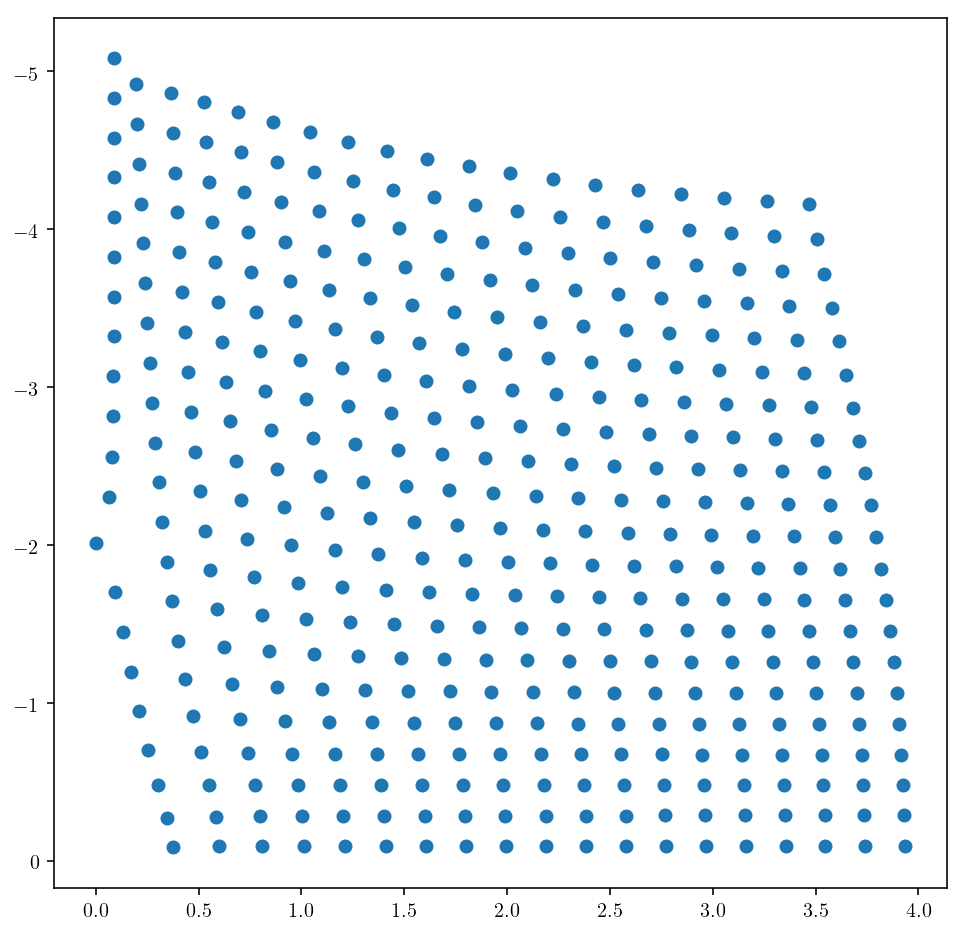

In [20]:
oms = [ my_dict[(s,l,n)][0] for (s,l,n) in my_dict.keys() if (s==-2)  ]
plt.figure(figsize=(8,8))
plt.scatter(np.real(oms),np.imag(oms))
plt.gca().invert_yaxis()
plt.show()